Data shape: (31043, 9)
Number of unique timestamps: 141
Number of unique locations (ROW, COL pairs): 242

Top 3 timestamps with highest rainfall (hour +1):
0: 4/30/2019 20:00 - Mean rainfall: 1.3331
1: 4/29/2019 16:00 - Mean rainfall: 1.3288
2: 4/30/2019 5:00 - Mean rainfall: 1.3065

Visualizing rainfall sequence for timestamp: 4/30/2019 20:00
Timestamp: 4/30/2019 20:00
  - Number of data points: 216

Prediction +1h:
  - Mean predicted: 0.7911
  - Max predicted: 3.9700
  - Mean actual: 1.3331
  - Max actual: 10.0000
  - MSE: 6.4591
  - R²: -0.1099

Prediction +2h:
  - Mean predicted: 0.5324
  - Max predicted: 1.9957
  - Mean actual: 1.3435
  - Max actual: 10.0000
  - MSE: 8.6606
  - R²: -0.1491

Prediction +3h:
  - Mean predicted: 0.4030
  - Max predicted: 1.0586
  - Mean actual: 1.4606
  - Max actual: 10.0000
  - MSE: 7.3809
  - R²: -0.1381


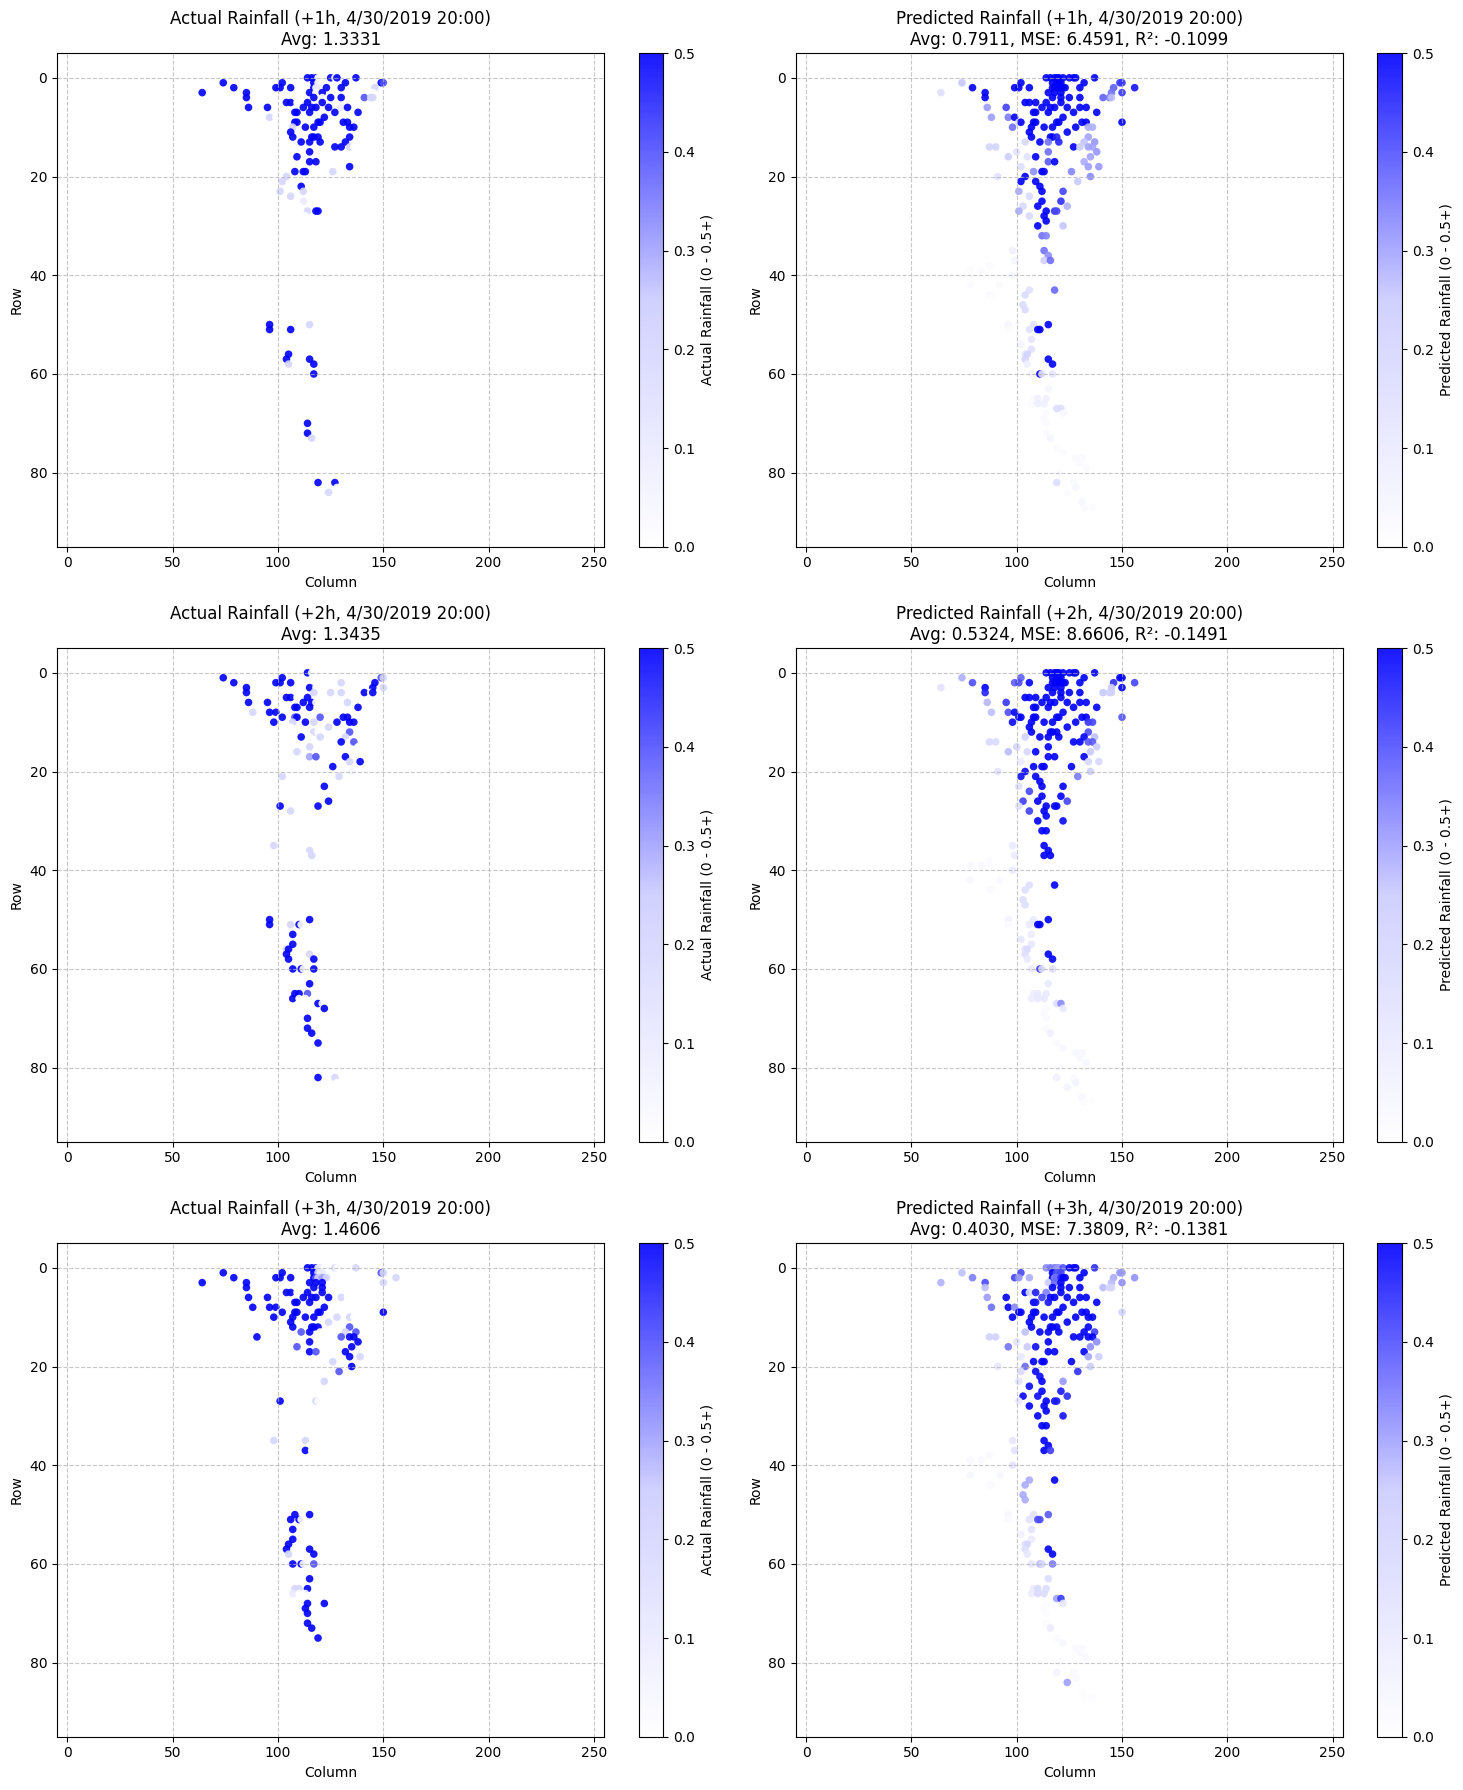


Visualizing rainfall sequence for timestamp: 4/29/2019 16:00
Timestamp: 4/29/2019 16:00
  - Number of data points: 212

Prediction +1h:
  - Mean predicted: 0.3310
  - Max predicted: 3.2828
  - Mean actual: 1.3288
  - Max actual: 10.0000
  - MSE: 8.7862
  - R²: 0.0964

Prediction +2h:
  - Mean predicted: 0.0991
  - Max predicted: 0.6929
  - Mean actual: 1.1708
  - Max actual: 10.0000
  - MSE: 8.3494
  - R²: -0.1354

Prediction +3h:
  - Mean predicted: 0.0860
  - Max predicted: 0.7832
  - Mean actual: 0.4868
  - Max actual: 10.0000
  - MSE: 2.7453
  - R²: -0.0635


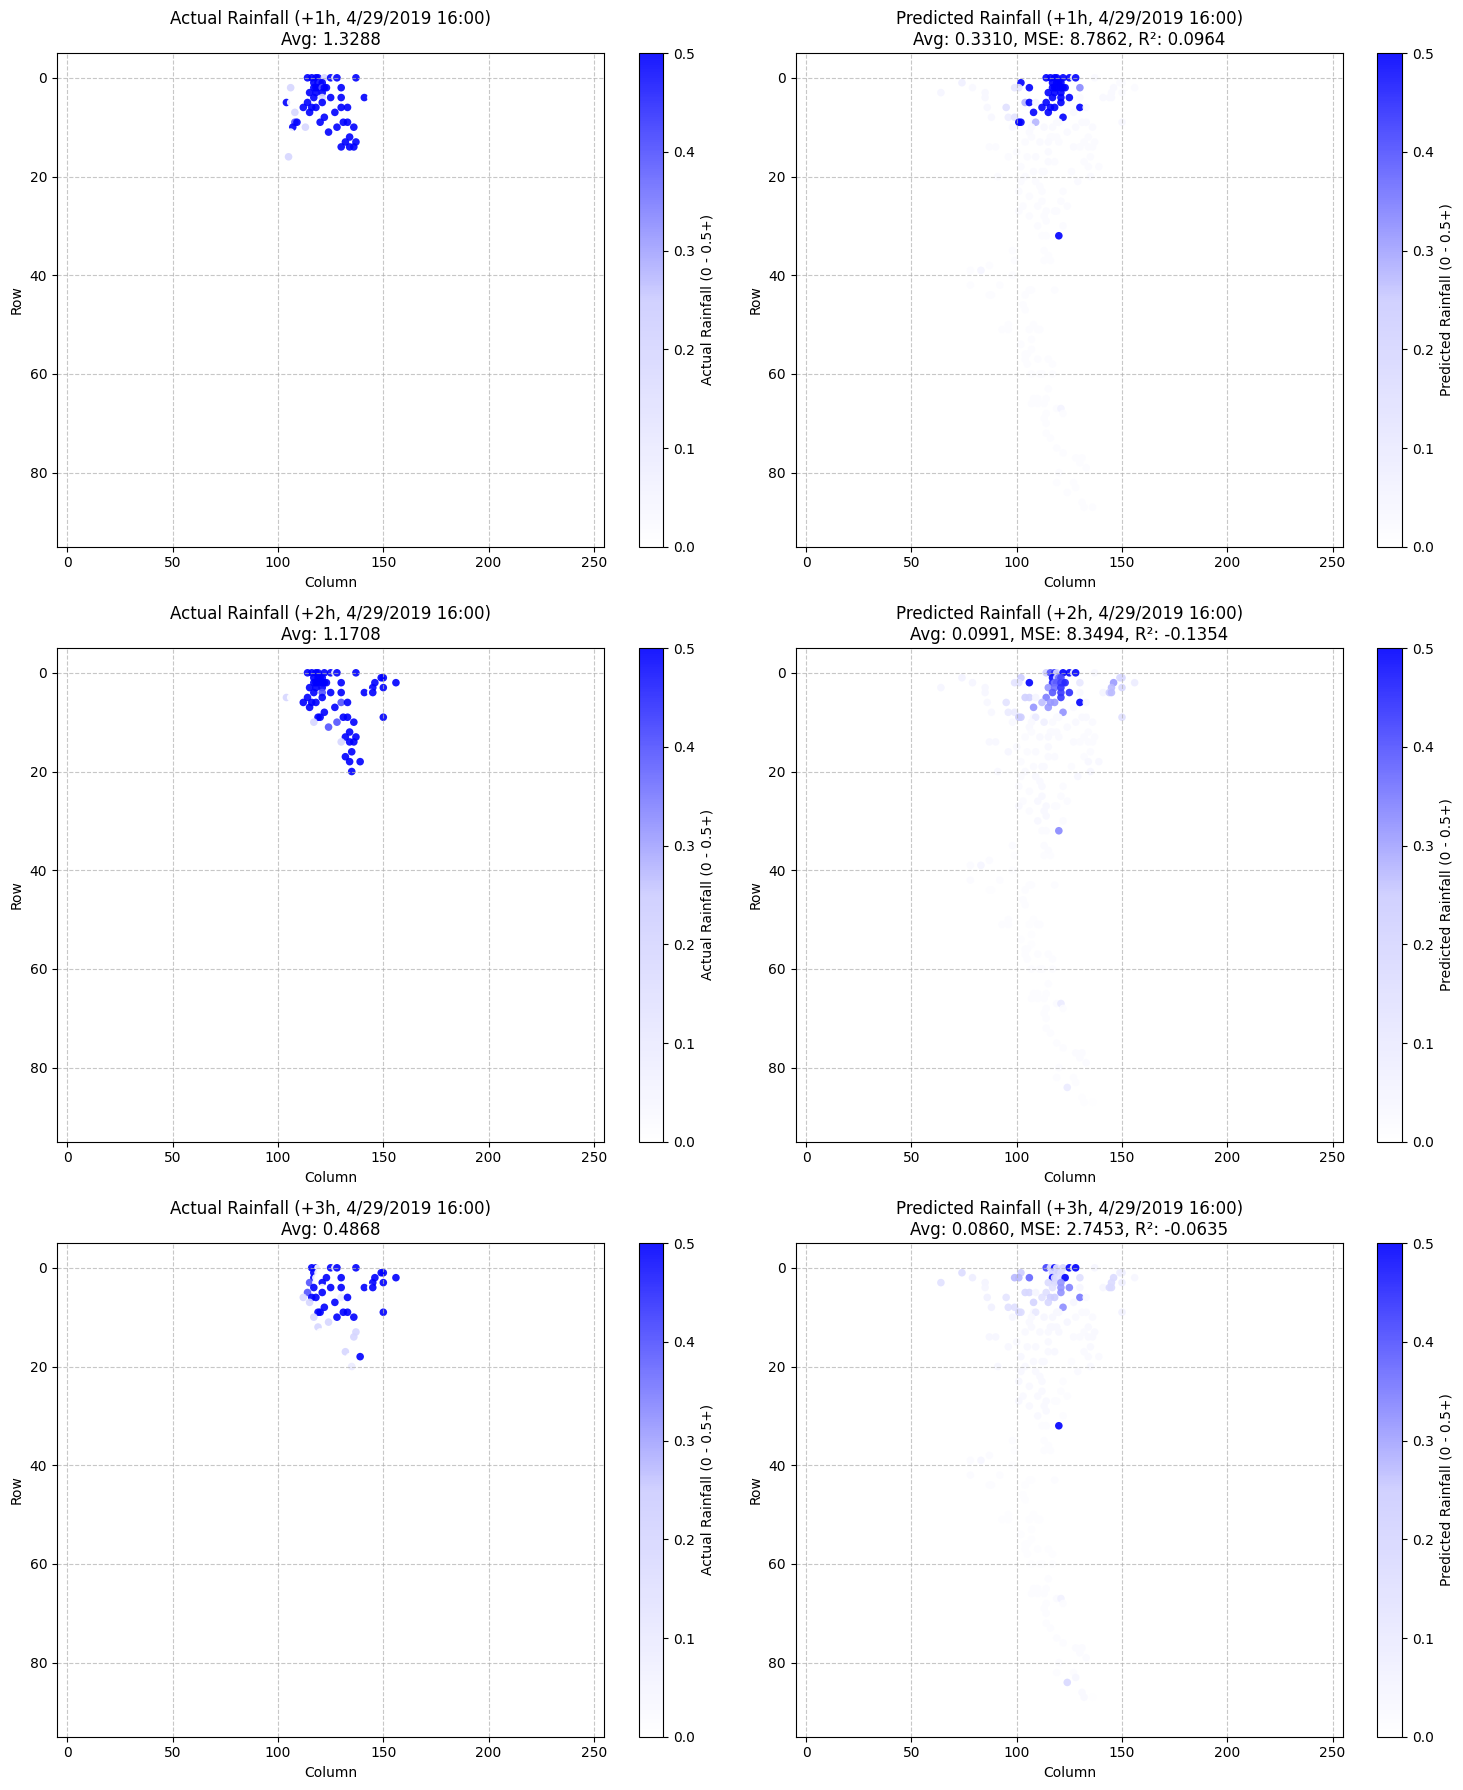


Visualizing rainfall sequence for timestamp: 4/30/2019 5:00
Timestamp: 4/30/2019 5:00
  - Number of data points: 224

Prediction +1h:
  - Mean predicted: 0.3119
  - Max predicted: 2.5076
  - Mean actual: 1.3065
  - Max actual: 10.0000
  - MSE: 9.6334
  - R²: -0.1321

Prediction +2h:
  - Mean predicted: 0.2113
  - Max predicted: 1.7620
  - Mean actual: 0.5625
  - Max actual: 10.0000
  - MSE: 3.4286
  - R²: -0.0861

Prediction +3h:
  - Mean predicted: 0.1980
  - Max predicted: 1.1851
  - Mean actual: 0.2433
  - Max actual: 10.0000
  - MSE: 1.9380
  - R²: -0.0528


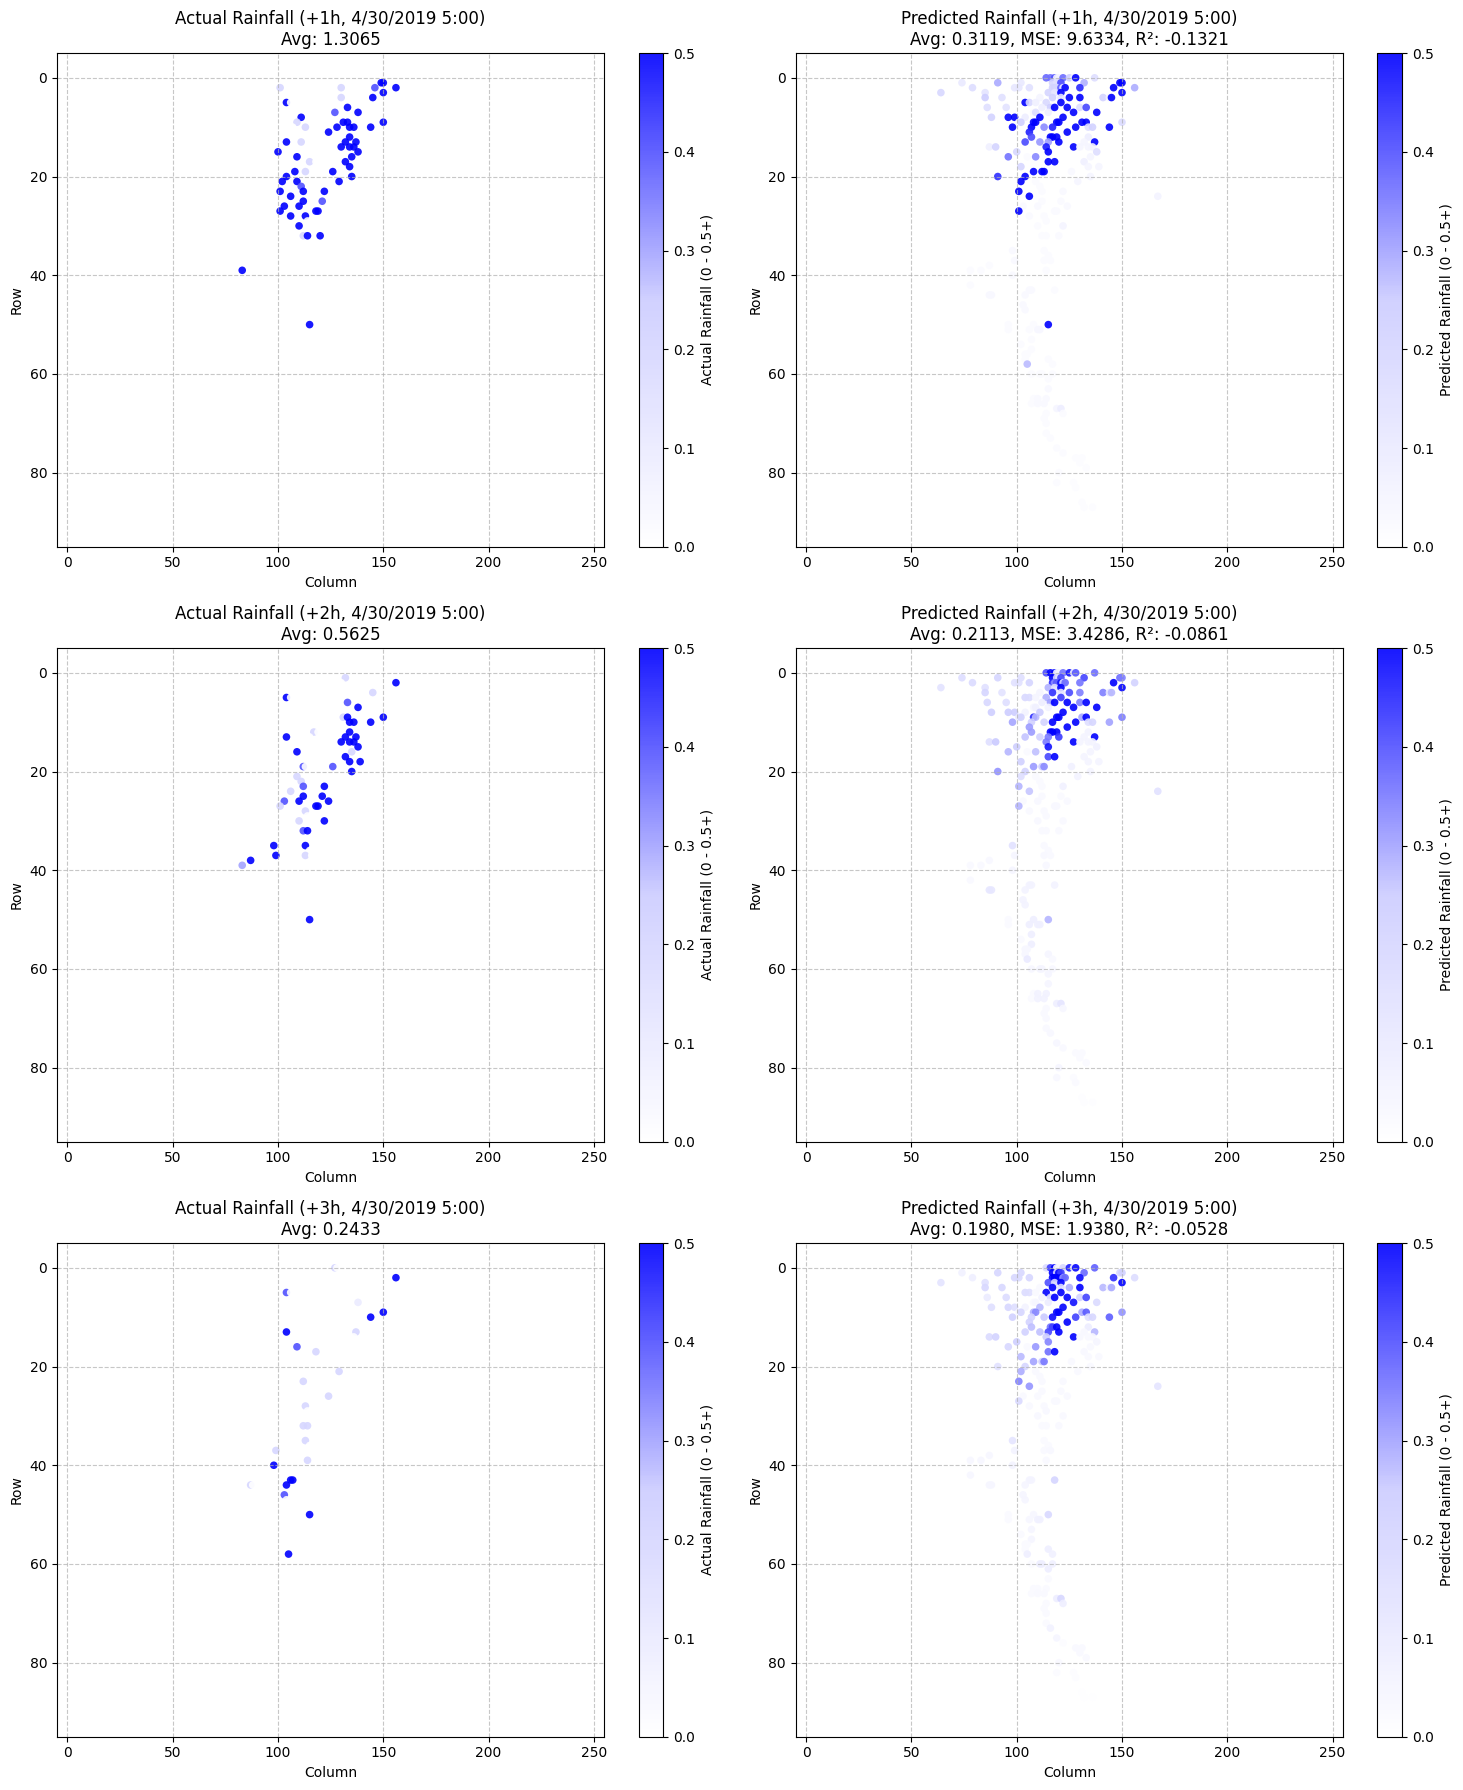

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_squared_error, r2_score

def load_rainfall_data(file_path):
    """Load rainfall data and print basic information"""
    df = pd.read_csv(file_path)
    print(f"Data shape: {df.shape}")
    print(f"Number of unique timestamps: {df['DATETIME'].nunique()}")
    print(f"Number of unique locations (ROW, COL pairs): {df.groupby(['ROW', 'COL']).ngroups}")
    return df

def visualize_rainfall_sequence(df, timestamp, grid_size=(90, 250), vmax=0.5):
    """
    Visualize all 3 prediction hours for a specific timestamp in a 3x2 grid
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing rainfall predictions and actual values
    timestamp : str
        Specific timestamp to visualize
    grid_size : tuple (height, width)
        Size of the visualization grid
    vmax : float
        Maximum value for colormap scaling
    """
    # Filter data for the selected timestamp
    time_data = df[df['DATETIME'] == timestamp].copy()
    
    if len(time_data) == 0:
        print(f"No data available for timestamp {timestamp}")
        return
    
    # Print statistics for the timestamp
    print(f"Timestamp: {timestamp}")
    print(f"  - Number of data points: {len(time_data)}")
    
    # Create figure and subplots - 3 rows (3 prediction hours), 2 columns (actual, predicted)
    fig, axes = plt.subplots(3, 2, figsize=(15, 18))
    
    # Define colormap (white to blue)
    colors = [(1, 1, 1, 0.7), (0.8, 0.8, 1, 0.8), (0, 0, 1, 1)]
    cmap_actual = LinearSegmentedColormap.from_list('actual_rainfall', colors)
    cmap_pred = LinearSegmentedColormap.from_list('predicted_rainfall', colors)
    
    # For each prediction hour (1h, 2h, 3h)
    for i, hour in enumerate([1, 2, 3]):
        pred_col = f'pred_+{hour}h'
        true_col = f'true_+{hour}h'
        
        # Print detailed statistics for each prediction hour
        print(f"\nPrediction +{hour}h:")
        print(f"  - Mean predicted: {time_data[pred_col].mean():.4f}")
        print(f"  - Max predicted: {time_data[pred_col].max():.4f}")
        print(f"  - Mean actual: {time_data[true_col].mean():.4f}")
        print(f"  - Max actual: {time_data[true_col].max():.4f}")
        
        # Calculate metrics
        try:
            valid_mask = ~time_data[true_col].isna() 
            if valid_mask.sum() > 1 and time_data.loc[valid_mask, true_col].nunique() > 1:
                mse = mean_squared_error(time_data.loc[valid_mask, true_col], 
                                      time_data.loc[valid_mask, pred_col])
                r2 = r2_score(time_data.loc[valid_mask, true_col], 
                             time_data.loc[valid_mask, pred_col])
                print(f"  - MSE: {mse:.4f}")
                print(f"  - R²: {r2:.4f}")
                has_metrics = True
            else:
                print("  - Cannot calculate metrics: insufficient variation in actual values")
                has_metrics = False
        except Exception as e:
            print(f"  - Error calculating metrics: {e}")
            has_metrics = False
        
        # Plot actual rainfall
        scatter_actual = axes[i, 0].scatter(
            time_data['COL'], time_data['ROW'],
            c=np.clip(time_data[true_col], 0, 10.0),
            cmap=cmap_actual,
            s=30, alpha=0.9,
            vmin=0, vmax=vmax,
            edgecolors='none'
        )
        
        axes[i, 0].set_title(f"Actual Rainfall (+{hour}h, {timestamp})\nAvg: {time_data[true_col].mean():.4f}")
        axes[i, 0].set_xlabel("Column")
        axes[i, 0].set_ylabel("Row")
        axes[i, 0].set_xlim(-5, grid_size[1] + 5)
        axes[i, 0].set_ylim(grid_size[0] + 5, -5)  # Invert y-axis
        axes[i, 0].grid(True, linestyle='--', alpha=0.7)
        
        # Plot predicted rainfall
        scatter_pred = axes[i, 1].scatter(
            time_data['COL'], time_data['ROW'],
            c=np.clip(time_data[pred_col], 0, 10.0),
            cmap=cmap_pred,
            s=30, alpha=0.9,
            vmin=0, vmax=vmax,
            edgecolors='none'
        )
        
        title = f"Predicted Rainfall (+{hour}h, {timestamp})\nAvg: {time_data[pred_col].mean():.4f}"
        if has_metrics:
            title += f", MSE: {mse:.4f}, R²: {r2:.4f}"
        axes[i, 1].set_title(title)
        
        axes[i, 1].set_xlabel("Column")
        axes[i, 1].set_ylabel("Row")
        axes[i, 1].set_xlim(-5, grid_size[1] + 5)
        axes[i, 1].set_ylim(grid_size[0] + 5, -5)
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)
        
        # Add colorbars
        cbar_actual = plt.colorbar(scatter_actual, ax=axes[i, 0])
        cbar_actual.set_label(f'Actual Rainfall (0 - {vmax}+)', fontsize=10)
        
        cbar_pred = plt.colorbar(scatter_pred, ax=axes[i, 1])
        cbar_pred.set_label(f'Predicted Rainfall (0 - {vmax}+)', fontsize=10)
    
    plt.tight_layout()
    return fig

def find_rainy_timestamps(df, threshold=0.1, n=5, hour=1):
    """
    Find timestamps with significant rainfall
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing rainfall data
    threshold : float
        Minimum mean rainfall value to consider
    n : int
        Number of timestamps to return
    hour : int
        Which prediction hour to use (1, 2, or 3)
    """
    true_col = f'true_+{hour}h'
    rain_by_timestamp = df.groupby('DATETIME')[true_col].mean()
    rainy_timestamps = rain_by_timestamp[rain_by_timestamp > threshold].sort_values(ascending=False)
    
    print(f"\nTop {min(n, len(rainy_timestamps))} timestamps with highest rainfall (hour +{hour}):")
    for i, (ts, rain) in enumerate(rainy_timestamps.head(n).items()):
        print(f"{i}: {ts} - Mean rainfall: {rain:.4f}")
        
    return rainy_timestamps.index.tolist()

def main():
    # Load data
    file_path = 'G:/Documents/Github/AI project/Prediction/XG/2019-04_fold5_test_predictions.csv'
    df = load_rainfall_data(file_path)
    
    # Number of timestamps to visualize
    num_timestamps = 3
    
    # Find timestamps with significant rainfall for 1-hour prediction
    rainy_timestamps = find_rainy_timestamps(df, threshold=0.5, n=num_timestamps, hour=1)
    
    # Visualize selected timestamps
    if rainy_timestamps:
        for i, timestamp in enumerate(rainy_timestamps[:num_timestamps]):
            print(f"\nVisualizing rainfall sequence for timestamp: {timestamp}")
            fig = visualize_rainfall_sequence(df, timestamp)
            
            # Save the figure
            plt.savefig(f'rainfall_map_sequence_{timestamp.replace(":", "-").replace("/", "-").replace(" ", "_")}.png', 
                       dpi=300, bbox_inches='tight')
            plt.show()
    else:
        print("No timestamps with significant rainfall found.")

if __name__ == "__main__":
    main()